In [57]:
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import GradientBoostingClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score
import sys
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# __Importing Libraries__
*     Scikit-learn (sklearn): A popular machine learning library in Python that provides a range of tools for building predictive models.
*     Pandas: A popular data manipulation library in Python that provides high-performance, easy-to-use data structures and data analysis tools.
*     Numpy: A fundamental library for numerical computing in Python that provides high-performance multidimensional arrays and tools for working with them.

# __Loading data__
We load the train and test data and analyse the sample size of the train and test data. We also show a few samples from train and test data each.

In [31]:
df= pd.read_csv('Insurance_Train.csv')
df1= pd.read_csv('Insurance_Test.csv')


(      id  age          job  marital  education  balance housing loan  \
 0  98749   32       admin.   single  secondary       64     yes   no   
 1  19550   45  blue-collar  married  secondary      534      no   no   
 2  75084   45   technician  married  secondary     1477     yes   no   
 3  65715   39   technician  married   tertiary       14      no   no   
 4  41412   49  blue-collar   single    unknown     2222      no   no   
 
     contact month  duration  campaign  pdays  previous poutcome  y  
 0   unknown   may       202         2     -1         0  unknown  0  
 1  cellular   aug       104         6     -1         0  unknown  0  
 2  cellular   nov        75         1    132         1  failure  0  
 3  cellular   jan       114         2     -1         0  unknown  0  
 4   unknown   jun       114         2     -1         0  unknown  0  ,
 (40689, 16),
      id  age          job  marital  education  balance housing loan   contact  \
 0  5149   42       admin.   single  second

We use the pandas describe function to summarize the statistics of the numerical columns

In [32]:
df.describe()

,id,age,balance,duration,campaign,pdays,previous,y
count,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000
mean,54899.530438,40.944555,1362.242621,257.943744,2.764457,40.340141,0.582344,0.116985
std,25930.988287,10.625554,3044.786399,257.888397,3.100915,100.247601,2.340269,0.321406
min,10000.000000,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32429.000000,33.000000,73.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,54845.000000,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,77361.000000,48.000000,1430.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,99998.000000,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40689 entries, 0 to 40688
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40689 non-null  int64 
 1   age        40689 non-null  int64 
 2   job        40689 non-null  object
 3   marital    40689 non-null  object
 4   education  40689 non-null  object
 5   balance    40689 non-null  int64 
 6   housing    40689 non-null  object
 7   loan       40689 non-null  object
 8   contact    40689 non-null  object
 9   month      40689 non-null  object
 10  duration   40689 non-null  int64 
 11  campaign   40689 non-null  int64 
 12  pdays      40689 non-null  int64 
 13  previous   40689 non-null  int64 
 14  poutcome   40689 non-null  object
 15  y          40689 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 5.0+ MB


We use these to analyze the distribution of y for particular column values, we see that there are __no__ missing values in the dataset

In [62]:
df.groupby('month')['y'].mean()

month
apr    0.197643
aug    0.111329
dec    0.449735
feb    0.167359
jan    0.103639
jul    0.089487
jun    0.103713
mar    0.517564
may    0.066602
nov    0.100889
oct    0.444444
sep    0.458984
Name: y, dtype: float64

Since the probability is high for certain months __one hot encoding__ will be the best encoding for this feature. We see here that the describe() call for the column of balance shows how it varies from -8019 to 102127, which is a large fluctuation compared to the other columns. We later on deal with this in the encoding by using a tanh function that captures the variation between these stark variations

# Plots



In [51]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

## Histograms

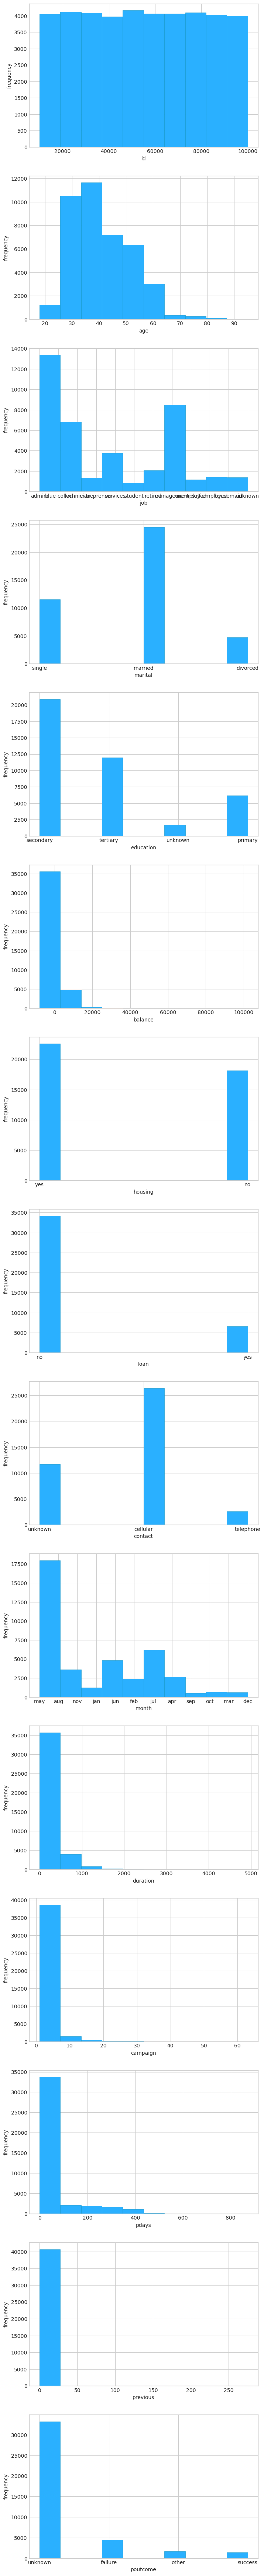

In [48]:
fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(8, 6*15))
plt.style.use('seaborn-whitegrid')
# Loop through each column and plot a histogram
for i in range(15):
    ax = axes[i]
    
    ax.hist(df.iloc[:, i], bins=10, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
#     fig.autofmt_xdate()
#     ax.set_xticks(df.columns[i])
#     ax.set_xticklabels(df.columns[i], rotation = 45)
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel('frequency')

# Show the plot
plt.show()

# Box plots
We now plot boxplots to gain a deeper insight into the columns.
* Box plot of age by marital: to compare the age distribution of customers across different marital status categories.
* Box plot of balance by job: to compare the balance distribution of customers across different job categories.
* Box plot of duration by education: to compare the duration distribution of calls made to customers across different education levels.
* Box plot of balance by marital: to compare the balance distribution of customers across different marital status categories.
* Box plot of duration by housing: to compare the duration distribution of calls made to customers who have or do not have housing loans.
* Box plot of duration by loan: to compare the duration distribution of calls made to customers who have or do not have personal loans.
* Box plot of campaign by contact: to compare the campaign distribution across different contact methods.
* Box plot of duration by month: to compare the duration distribution of calls made to customers in different months.

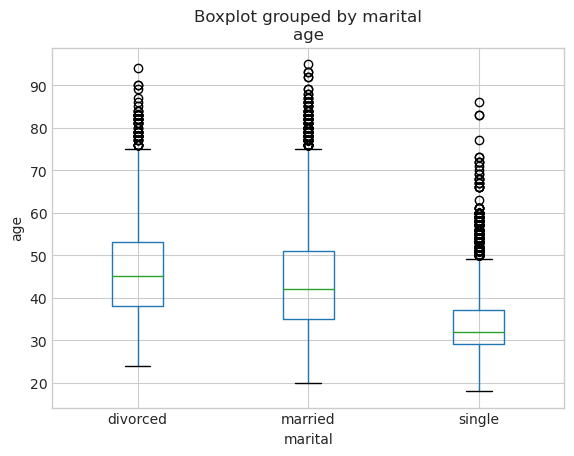

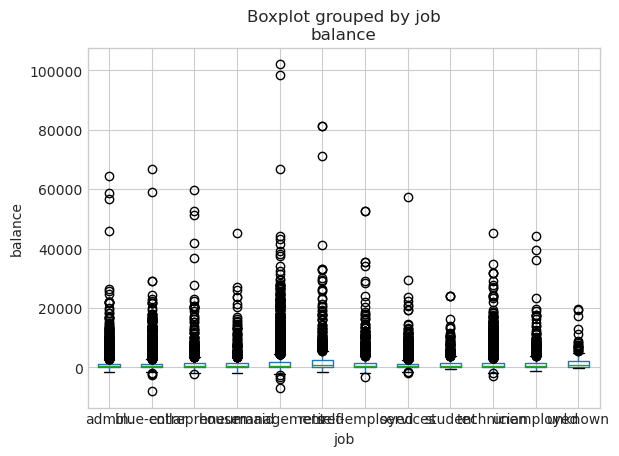

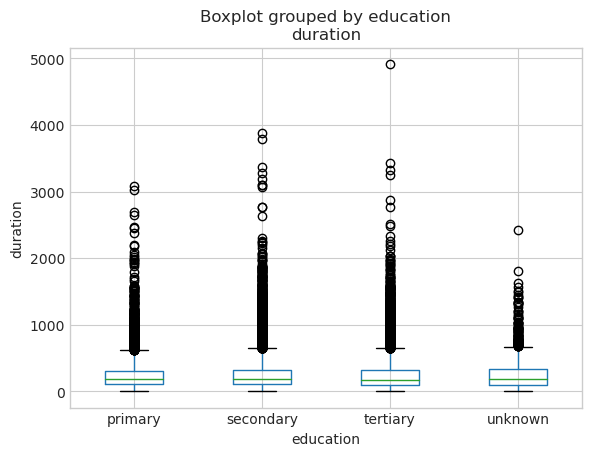

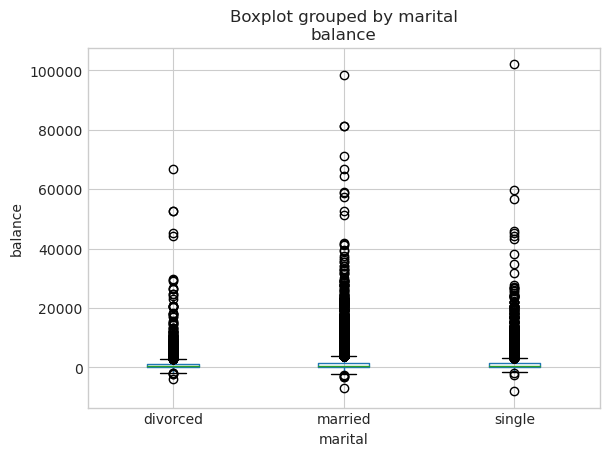

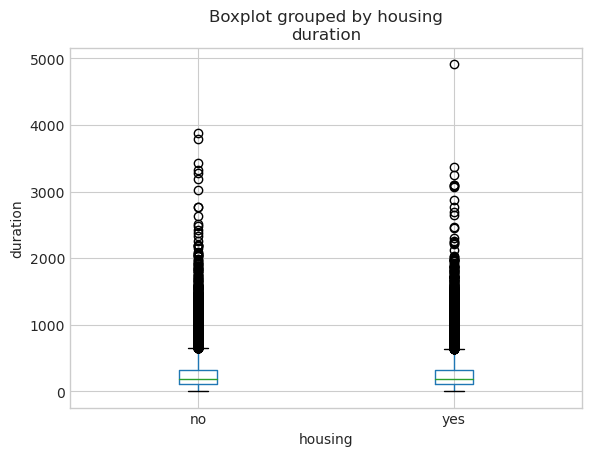

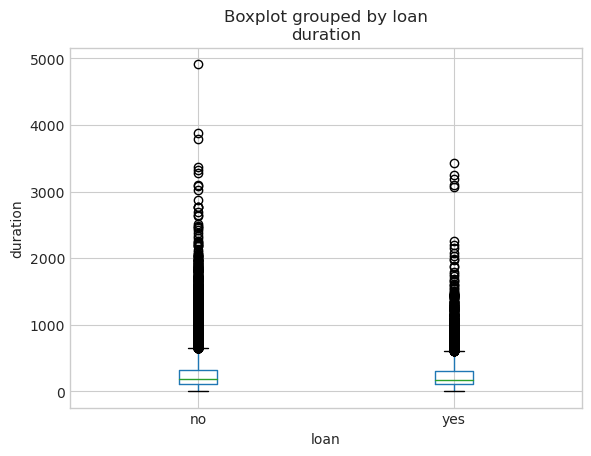

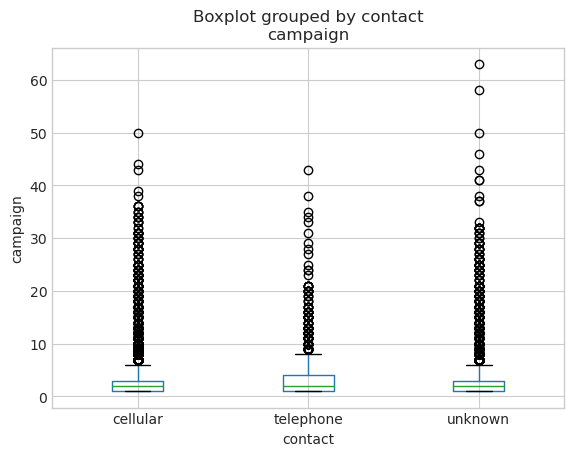

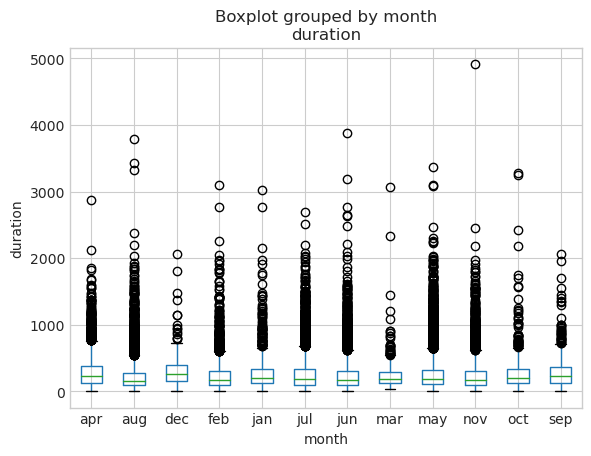

In [53]:

# Box plot of age by marital
df.boxplot(column='age', by='marital')
plt.xlabel('marital')
plt.ylabel('age')
plt.show()

# Box plot of balance by job
df.boxplot(column='balance', by='job')
plt.xlabel('job')
plt.ylabel('balance')
plt.show()

# Box plot of duration by education
df.boxplot(column='duration', by='education')
plt.xlabel('education')
plt.ylabel('duration')
plt.show()

# Box plot of balance by marital
df.boxplot(column='balance', by='marital')
plt.xlabel('marital')
plt.ylabel('balance')
plt.show()

# Box plot of duration by housing
df.boxplot(column='duration', by='housing')
plt.xlabel('housing')
plt.ylabel('duration')
plt.show()

# Box plot of duration by loan
df.boxplot(column='duration', by='loan')
plt.xlabel('loan')
plt.ylabel('duration')
plt.show()

# Box plot of campaign by contact
df.boxplot(column='campaign', by='contact')
plt.xlabel('contact')
plt.ylabel('campaign')
plt.show()

# Box plot of duration by month
df.boxplot(column='duration', by='month')
plt.xlabel('month')
plt.ylabel('duration')
plt.show()


# Correlation Matrix

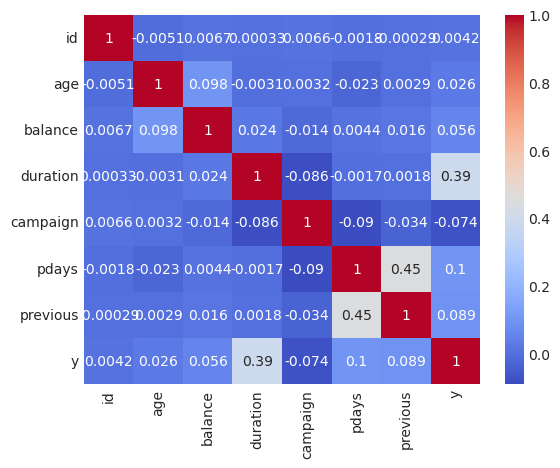

In [58]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

We see that pday, previous and duration, y have high correlation so we tried __PCA__ for clubbing the pdays and previous together but we didnt get an increase in accuracy.

# Feature engineering
* We now analyze the categorical variables. In particular, we look at education where we use a type of encoding to account for the __ordinal nature of the data__.
* Ordinal data is a type of categorical data that has a natural ordering or ranking between its values.
* Now we look at the balance column. Through our previous .describe() function call we analyzed the distribution of balance. 
* We notice that it varies drastically, and clipping its extreme values helps to an extent. 
* We further map it to a __tanh function so as to emphasize the difference between positive and negative values__.
* We the come to the age and duration columns where we normalize it with train distribution.
* We also remove the outliers in the previous column by the .clip() function call
* We also drop the 'id' column as it is not indicative of the outcome.

In [8]:
dic = {
    "unknown": 2,
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df["education"] = df["education"].replace(dic)
df1["education"] = df1["education"].replace(dic)

df["balance"] = np.tanh(0.15*df["balance"].clip(-10000, 8500))
df1["balance"] = np.tanh(0.15*df1["balance"].clip(-10000, 8500))



df["age"] = (df["age"] - 40)/10
df1["age"] = (df1["age"] - 40)/10

df["duration"] = (df["duration"] - 257.943744)/257.888397
df1["duration"] = (df1["duration"] - 257.943744)/257.888397

df["previous"] = df["previous"].clip(-1, 1)
df1["previous"] = df1["previous"].clip(-1, 1)

df1 = df1.drop(["id"], axis=1)

In [9]:
df.head()

,id,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,98749,-0.8,admin.,single,2,0.999994,yes,no,unknown,may,-0.216930,2,-1,0,unknown,0
1,19550,0.5,blue-collar,married,2,1.000000,no,no,cellular,aug,-0.596939,6,-1,0,unknown,0
2,75084,0.5,technician,married,2,1.000000,yes,no,cellular,nov,-0.709391,1,132,1,failure,0
3,65715,-0.1,technician,married,3,0.885352,no,no,cellular,jan,-0.558163,2,-1,0,unknown,0
4,41412,0.9,blue-collar,single,2,1.000000,no,no,unknown,jun,-0.558163,2,-1,0,unknown,0


In [10]:
df_x_train= df.drop(["y", "id"], axis=1)
df_y_train= df["y"]
df_x_train

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,-0.8,admin.,single,2,0.999994,yes,no,unknown,may,-0.216930,2,-1,0,unknown
1,0.5,blue-collar,married,2,1.000000,no,no,cellular,aug,-0.596939,6,-1,0,unknown
2,0.5,technician,married,2,1.000000,yes,no,cellular,nov,-0.709391,1,132,1,failure
3,-0.1,technician,married,3,0.885352,no,no,cellular,jan,-0.558163,2,-1,0,unknown
4,0.9,blue-collar,single,2,1.000000,no,no,unknown,jun,-0.558163,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40684,-1.1,technician,single,2,1.000000,yes,no,unknown,jun,-0.930417,3,-1,0,unknown
40685,1.9,admin.,married,2,1.000000,yes,no,cellular,may,-0.461222,2,350,1,failure
40686,1.4,blue-collar,married,2,1.000000,no,no,cellular,aug,1.016161,7,-1,0,unknown
40687,0.6,blue-collar,married,1,1.000000,yes,no,unknown,may,-0.158765,1,-1,0,unknown


__get_dummies__ is a pandas-specific method that is used to convert categorical variables into numerical ones by creating dummy variables for each category, with a binary (0 or 1) value indicating whether the category is present or absent in the original data.

In [11]:
df_encoded= pd.get_dummies(df_x_train)
df1_encoded= pd.get_dummies(df1)

(   age  education   balance  duration  campaign  pdays  previous  job_admin.  \
 0 -0.8          2  0.999994 -0.216930         2     -1         0           1   
 1  0.5          2  1.000000 -0.596939         6     -1         0           0   
 
    job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
 0                0                 0  ...          0          0          1   
 1                1                 0  ...          0          0          0   
 
    month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
 0          0          0          0                 0               0   
 1          0          0          0                 0               0   
 
    poutcome_success  poutcome_unknown  
 0                 0                 1  
 1                 0                 1  
 
 [2 rows x 45 columns],
 (40689, 16),
    age  education   balance  duration  campaign  pdays  previous  job_admin.  \
 0  0.2          2  1.000000  0.287164         2   

In [12]:
data = df_encoded.astype(float)
data_y = df_y_train.astype(float)
data_test = df1_encoded.astype(float)

(pandas.core.frame.DataFrame,
 (40689, 45),
    age  education   balance  duration  campaign  pdays  previous  job_admin.  \
 0 -0.8        2.0  0.999994 -0.216930       2.0   -1.0       0.0         1.0   
 1  0.5        2.0  1.000000 -0.596939       6.0   -1.0       0.0         0.0   
 
    job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
 0              0.0               0.0  ...        0.0        0.0        1.0   
 1              1.0               0.0  ...        0.0        0.0        0.0   
 
    month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
 0        0.0        0.0        0.0               0.0             0.0   
 1        0.0        0.0        0.0               0.0             0.0   
 
    poutcome_success  poutcome_unknown  
 0               0.0               1.0  
 1               0.0               1.0  
 
 [2 rows x 45 columns],
 pandas.core.frame.DataFrame,
 (4522, 45),
    age  education   balance  duration  campaign  pdays  pr

In [13]:
data_train= data.values
data_train_y= data_y.values

data_test = data_test.values
data_train.shape , data_test.shape

((40689, 45), (4522, 45))

We then split the data into features and output

In [14]:
x_train , y_train = data_train[:,1:], data_train_y
x_test = data_test[:,1:]

# Model Selection
We implement multiple models to find the best performing model.
We link these experiments in a different notebook, which are linked. 

__Logistic Regression__

* Logistic regression is a statistical method used for binary classification tasks.

* In logistic regression, the probability of the positive class is modeled as:

    $p(y=1 | x; w) = 1 / (1 + exp(-w^{T x))$

where x is a vector of predictor variables, w is a vector of coefficients to be estimated, and ^T denotes transpose.
* 
* Maximum likelihood estimation is used to estimate the coefficients w that maximize the likelihood of observing the training data, given the model:
* 
    $L(w) = ∏_{i=1}^N p(y_i | x_i; w)$

* The log-likelihood function is:

    $l(w) = log L(w) = ∑_{i=1}^N y_i log(p(y_i=1 | x_i; w)) + (1-y_i) log(1-p(y_i=1 | x_i; w))$

* The coefficients w are typically estimated using gradient descent or Newton-Raphson optimization.

__Decision Tree__


* A decision tree is a type of supervised learning algorithm that is commonly used for classification and regression tasks.

* The algorithm works by recursively partitioning the data into subsets based on the values of the predictor variables, with the goal of minimizing the impurity or uncertainty in each subset.

* Each partition is represented by a node in the tree, and the predictor variable and threshold that define the partition are stored at the node.

* The tree is constructed by recursively partitioning the data until a stopping criterion is met, such as reaching a maximum depth or minimum number of samples per leaf node.

* To make a prediction on new data, the algorithm traverses the tree from the root node to a leaf node, using the predictor variables at each node to determine the path to take.

* The predicted class or value is then based on the majority class or mean value of the training data in the corresponding leaf node.
* Decision trees can suffer from overfitting if the tree is too complex, which can be mitigated by pruning or using ensemble methods such as random forests or gradient boosting.

__Random Forest__

*  A random forest is an ensemble learning method for classification, regression, and other tasks that combines multiple decision trees to produce more accurate predictions.

* The algorithm works by constructing a set of decision trees, where each tree is trained on a random subset of the training data and a random subset of the predictor variables.

* The predictions from each tree are then aggregated using either the majority vote (for classification) or the mean value (for regression) to produce the final prediction.

* The random subset of predictor variables is chosen to decorrelate the trees and reduce overfitting, while the random subset of training data is chosen to reduce the variance of the model.

* The algorithm can be summarized using the following equations:

* For each tree i, sample a bootstrap sample of size n from the training data D:
*     $D_i = {(x_1, y_1), ..., (x_n, y_n)}_i$, where each (x_i, y_i) is a training example.

* For each tree i, select a random subset of m predictor variables from the total set M:
*     $M_i = {j_1, j_2, ..., j_m}_i$, where each j_k is an index into the predictor variables.

* For each tree i, construct a decision tree T_i using D_i and M_i.

* To make a prediction on new data x, aggregate the predictions from all trees:
*     $y = argmax_{c} (1/K) * sum_{i=1}^K [T_i(x) == c]$, where K is the number of trees, T_i(x) is the predicted class for tree i, and c is a class label.

* Random forests are widely used in many fields, including finance, marketing, and healthcare, due to their high accuracy, robustness to noise and outliers, and ability to handle high-dimensional data.

__GradientBoostingClassifier__


* Gradient Boosting Classifier is a machine learning algorithm for classification tasks.

* It combines multiple weak learners into a strong learner.

* The algorithm iteratively adds decision trees to the model.

* Each tree is trained on the negative gradient of the loss function with respect to the current model predictions.

* The process continues until a stopping criterion is met.

* Gradient Boosting Classifier has achieved state-of-the-art performance on many classification tasks.

* 1. Initialise predictions to mean of the variables
$$f_0(x) = mean(y)$$
2. Compute the gradient
$$r_{it} = - [∂L(y_i, f(x_i)) / ∂f(x_i)]_{f=f_{t-1}}$$
3. Train decision tree
$$h_t = argmin_h sum_{i=1}^N [r_{it} - h(x_i)]^2$$
4. Compute step size for new tree
$$γ_t = argmin_γ sum_{i=1}^N L(y_i, f_{t-1}(x_i) + γh_t(x_i))$$
5.new tree with the computed step size
$$f_t(x) = f_{t-1}(x) + γ_t h_t(x)$$

In [15]:
def gbm(number_of_estimators,learn_rate,max_d,min_ss,min_sl):
    return GradientBoostingClassifier(
    n_estimators=number_of_estimators,  # Number of estimators (trees) to use
    learning_rate=learn_rate,  # Learning rate for updates
    max_depth=max_d,  # Maximum depth of each tree
    min_samples_split=min_ss,  # Minimum number of samples required to split a node
    min_samples_leaf=min_sl,  # Minimum number of samples required to be at a leaf node
    subsample=1,  # Subsample ratio for training each tree
    random_state=42  # Random seed for reproducibility
    ).fit(x_train, y_train)

We got the hyperparameters using __bayesian hyperparameter optimization__

In [16]:
y_pred=gbm(866,0.09, 4, 6, 10).predict(x_test)
type(y_pred), x_test.shape

(numpy.ndarray, (4522, 44))

In [17]:
y_pred= y_pred.astype(float)
y_pred= y_pred.astype(int)
y_pred_f= y_pred.reshape(-1,1)

data_f= df1.to_numpy()

In [19]:
array1 = [list(map(str, sublist)) for sublist in data_f[:,:1]]
array2 = [list(map(str, sublist)) for sublist in y_pred_f]

result = [array1[i] + array2[i] for i in range(len(array1))]
result= np.array(result)[:, 1]

In [21]:
## Creates submission file.

sub = pd.read_csv("sample_submission.csv")
sub["y"] = result
sub.to_csv("submission.csv", index=False)
sub.head()

,id,y
0,5149,0
1,6179,0
2,4846,0
3,3676,0
4,4256,0
